In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Players/train'
valid_path = 'Players/validation'

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 32s 1us/step


In [4]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob('Players/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:

from keras.preprocessing.image import ImageDataGenerator

Found 740 images belonging to 4 classes.
Found 151 images belonging to 4 classes.
Epoch 1/5
24/24 [==============================] - 91s 4s/step - loss: 0.2851 - accuracy: 0.9162 - val_loss: 0.4406 - val_accuracy: 0.7947
Epoch 2/5
24/24 [==============================] - 98s 4s/step - loss: 0.1973 - accuracy: 0.9568 - val_loss: 0.3065 - val_accuracy: 0.8808
Epoch 3/5
24/24 [==============================] - 99s 4s/step - loss: 0.1939 - accuracy: 0.9649 - val_loss: 0.1899 - val_accuracy: 0.8609
Epoch 4/5
24/24 [==============================] - 99s 4s/step - loss: 0.1452 - accuracy: 0.9716 - val_loss: 0.7741 - val_accuracy: 0.8675
Epoch 5/5
24/24 [==============================] - 98s 4s/step - loss: 0.1465 - accuracy: 0.9703 - val_loss: 0.1795 - val_accuracy: 0.8940


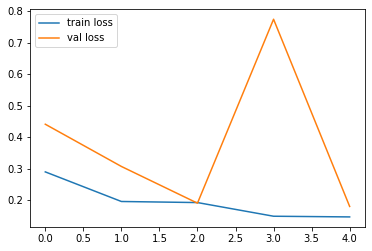

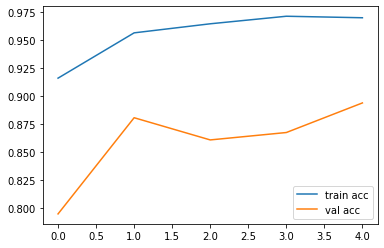

<Figure size 432x288 with 0 Axes>

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Players/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Players/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
model.save('players_model.h5')